___
# Ciência dos Dados - PROJETO 1

## Leonardo Imakuma Neves

## A diferença salarial entre homem e mulheres é maior do que a diferença salarial de etnias?

___
## Introdução

Busco analisar a diferença salarial entre as diferentes raças/cores da população brasileira ,compara las com diferença salarial encontrada entre mulheres e homens , e analisar o grau de escolaridade da população e ver como ele influencia na diferença salarial.

___
## Filtros da base de dados

In [113]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like

In [114]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\OneDrive\insper\dps 2018\ciencia dos dados\projeto 1


In [115]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dd2011=pd.read_csv('PES2011.csv',sep=',')


In [116]:
#Pegar as colunas
dadosID2011= dd2011.loc[: ,["V0302","V6007","V4743","V0404","V8005","V4742"]]

In [117]:

dadosID2011.V0302=dadosID2011.V0302.astype("category")
dadosID2011.V0302.cat.categories=(['Masculino','Feminino'])
dadosID2011.V6007=dadosID2011.V6007.astype("category")
dadosID2011.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosID2011.V4743=dadosID2011.V4743.astype("category")
dadosID2011.V4743.cat.categories=(['Sem rendimento','Até ¼ ','¼ até ½ ','De ½ até 1 ','De 1 até 2 ','De 2 até 3 ','De 3 até 5','Mais de 5','Sem declaração'])
dadosID2011.V0404=dadosID2011.V0404.astype("category")
dadosID2011.V0404.cat.categories=(['Indígena','Branca','Preta','Amarela','Parda'])
dadosID2011.V4742=dadosID2011.V4742.astype('float')

In [118]:
#tirar os NaN
#Dados2011Completos=dadosID2011.dropna()

In [119]:
#filtragem por cor/raça
indio=dadosID2011.loc[(dadosID2011['V0404'] == 'Indígena')]
branca=dadosID2011.loc[(dadosID2011['V0404'] == 'Branca')]
negra=dadosID2011.loc[(dadosID2011['V0404'] == 'Preta')]
parda=dadosID2011.loc[(dadosID2011['V0404'] == 'Parda')]
amarela=dadosID2011.loc[(dadosID2011['V0404'] == 'Amarela')]

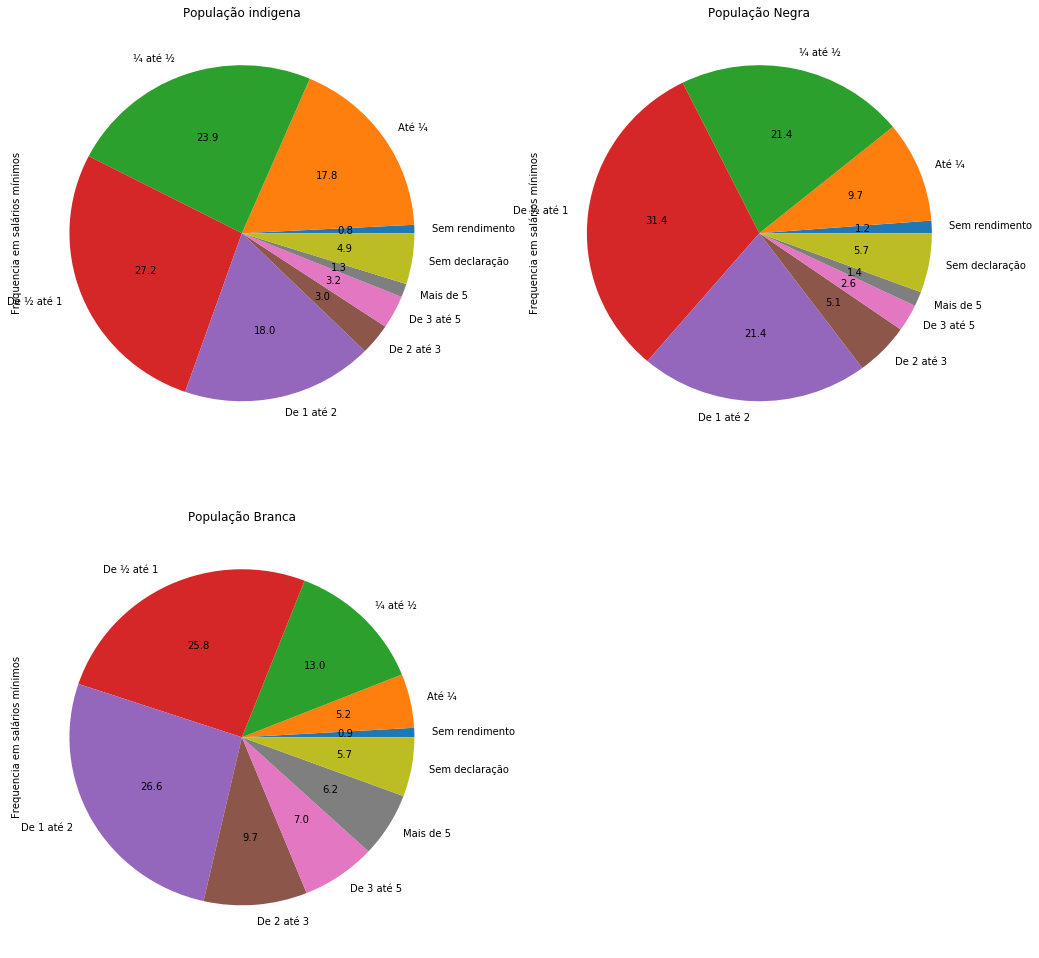

In [120]:
fig = plt.figure(figsize=(17, 17))

###########################################################################################################################
entrada = (indio.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = entrada.plot(kind='pie',title='População indigena',autopct='%.1f')
plt.ylabel('Frequencia em salários mínimos')
plt.xlabel('')

entrada2 = (negra.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = entrada2.plot(kind='pie',title='População Negra',autopct='%.1f')
plt.ylabel('Frequencia em salários mínimos')
plt.xlabel('')



entrada3 = (branca.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(223)
plot = entrada3.plot(kind='pie',title='População Branca',autopct='%.1f')
plt.ylabel('Frequencia em salários mínimos')


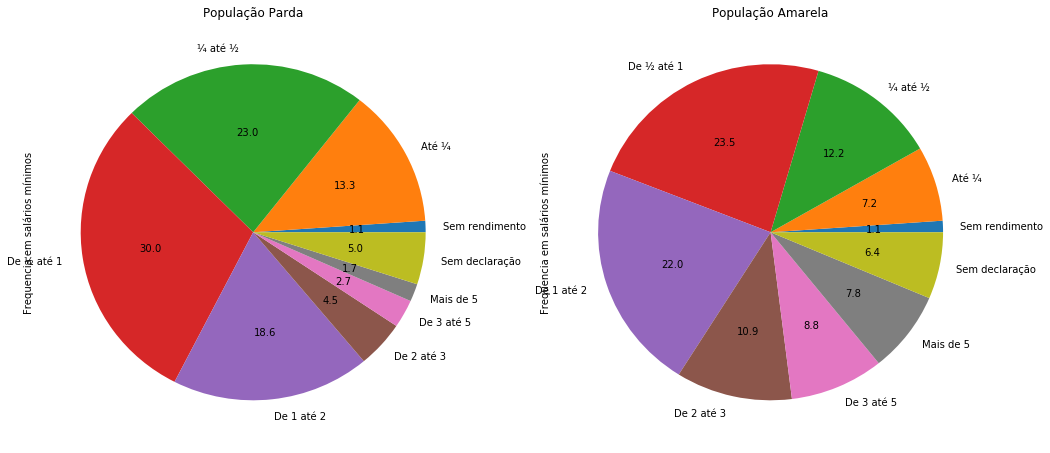

In [121]:
fig = plt.figure(figsize=(17, 17))

entrada4 = (parda.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = entrada4.plot(kind='pie',title='População Parda',autopct='%.1f')
plt.ylabel('Frequencia em salários mínimos')


entrada5 = (amarela.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = entrada5.plot(kind='pie',title='População Amarela',autopct='%.1f')
plt.ylabel('Frequencia em salários mínimos')



In [122]:
#filtragem por sexo
homens=dadosID2011.loc[(dadosID2011['V0302'] == 'Masculino')]
mulheres=dadosID2011.loc[(dadosID2011['V0302'] == 'Feminino')]

In [123]:
def converter(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [124]:
cores1 = (dadosID2011.V0404.value_counts(sort=True, normalize=True)*100).round(decimals=1)
print(cores1,'\n')


Parda       46.2
Branca      44.3
Preta        8.5
Indígena     0.5
Amarela      0.5
Name: V0404, dtype: float64 



In [125]:
#Freq.relativa (%) por faixa salarial
salariocor = pd.crosstab([dadosID2011.V0404],dadosID2011.V4743)*(100/358919)
salariocor

V4743,Sem rendimento,Até ¼,¼ até ½,De ½ até 1,De 1 até 2,De 2 até 3,De 3 até 5,Mais de 5,Sem declaração
V0404,,,,,,,,,
Indígena,0.003901,0.089714,0.120640,0.137914,0.090828,0.015045,0.016160,0.006687,0.024518
Branca,0.415414,2.279344,5.751716,11.416503,11.762264,4.283418,3.083704,2.720948,2.526754
Preta,0.102530,0.824977,1.814058,2.661603,1.807650,0.434638,0.220663,0.119526,0.480053
Amarela,0.005572,0.035941,0.061017,0.117297,0.110053,0.054608,0.044021,0.038727,0.032041
Parda,0.519059,6.133417,10.592362,13.825125,8.570179,2.090722,1.233705,0.766190,2.317793


In [127]:
#salario por escolaridade e cor/raça
edusal2=pd.crosstab([dadosID2011.V6007,dadosID2011.V0404],dadosID2011.V4743)*(100/358919)
edusal2

V4743                                                        Sem rendimento  \
V6007                                              V0404                      
Elementar (primário)                               Indígena        0.001114   
                                                   Branca          0.036498   
                                                   Preta           0.009752   
                                                   Amarela         0.000836   
                                                   Parda           0.036220   
Médio 1º ciclo (ginasial, etc.)                    Indígena        0.000000   
                                                   Branca          0.010030   
                                                   Preta           0.002508   
                                                   Amarela         0.000000   
                                                   Parda           0.009194   
Médio 2º ciclo (científico, clássico, etc.)        Indígena        0.000557   
                                                   Branca          0.004179   
                                                   Preta           0.000557   
                                                   Amarela         0.000000   
                                                   Parda           0.003622   
Regular do ensino fundamental ou do 1º grau        Indígena        0.000279   
                                                   Branca          0.080241   
                                                   Preta           0.024797   
                                                   Amarela         0.001393   
                                                   Parda           0.123983   
Regular do ensino médio ou do 2º grau              Indígena        0.000836   
                                                   Branca          0.074669   
                                                   Preta           0.022568   
                                                   Amarela         0.000557   
                                                   Parda           0.092779   
Educação de jovens e adultos ou supletivo do en... Indígena        0.000000   
                                                   Branca          0.004179   
                                                   Preta           0.000557   
                                                   Amarela         0.000000   
                                                   Parda           0.003065   
...                                                                     ...   
Superior de graduação                              Indígena        0.000000   
                                                   Branca          0.026190   
                                                   Preta           0.001672   
                                                   Amarela         0.001114   
                                                   Parda           0.011702   
Mestrado ou doutorado                              Indígena        0.000000   
                                                   Branca          0.000557   
                                                   Preta           0.000000   
                                                   Amarela         0.000000   
                                                   Parda           0.000000   
Alfabetização de jovens e adultos                  Indígena        0.000000   
                                                   Branca          0.001114   
                                                   Preta           0.000279   
                                                   Amarela         0.000000   
                                                   Parda           0.004179   
Creche                                             Indígena        0.000000   
                                                   Branca          0.001672   
                                                  

In [146]:
#o valor do step foi definido com base no salario minimo de 2011
faixa = range(100,4000,271)
#tirar os nan da renda1
renda=dadosID2011.V4742[(dadosID2011.V4742 >= 0) &(dadosID2011.V4742 != 999999999999)]
renda=renda.dropna()
renda.describe()

count    3.580540e+05
mean     5.394158e+10
std      2.259027e+11
min      0.000000e+00
25%      2.500000e+02
50%      4.810000e+02
75%      9.150000e+02
max      1.000000e+12
Name: V4742, dtype: float64

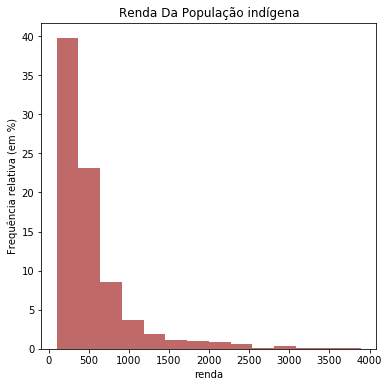

count    1.814000e+03
mean     4.851158e+10
std      2.149038e+11
min      0.000000e+00
25%      1.665000e+02
50%      3.580000e+02
75%      6.140000e+02
max      1.000000e+12
Name: V4742, dtype: float64
48511577108.3925


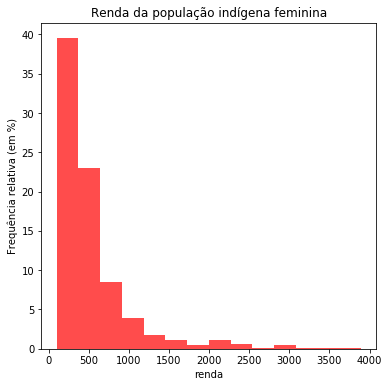

count    9.490000e+02
mean     4.531085e+10
std      2.080947e+11
min      0.000000e+00
25%      1.610000e+02
50%      3.540000e+02
75%      6.140000e+02
max      1.000000e+12
Name: V4742, dtype: float64


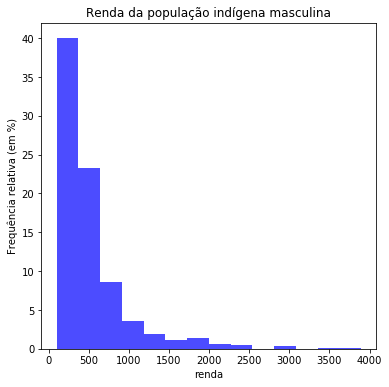

count    8.650000e+02
mean     5.202312e+10
std      2.222022e+11
min      0.000000e+00
25%      1.710000e+02
50%      3.600000e+02
75%      6.200000e+02
max      1.000000e+12
Name: V4742, dtype: float64


In [144]:
renda_indios=renda.loc[(dadosID2011['V0404'] == 'Indígena')]
plot = renda_indios.plot.hist(bins=faixa,title='Renda Da População indígena', weights=zeros_like(renda_indios)+1./renda_indios.size*100, figsize=(6, 6), alpha=0.7,color=("Brown"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indios.describe())

renda_indias=renda_indios.loc[(indio['V0302'] == 'Feminino')]
plot2 = renda_indias.plot.hist(bins=faixa,title='Renda da população indígena feminina', weights=zeros_like(renda_indias)+1./renda_indias.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indias.describe())

renda_indios_homens=renda_indios.loc[(indio['V0302'] == 'Masculino')]
plot3 = renda_indios_homens.plot.hist(bins=faixa,title='Renda da população indígena masculina', weights=zeros_like(renda_indios_homens)+1./renda_indios_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indios_homens.describe())

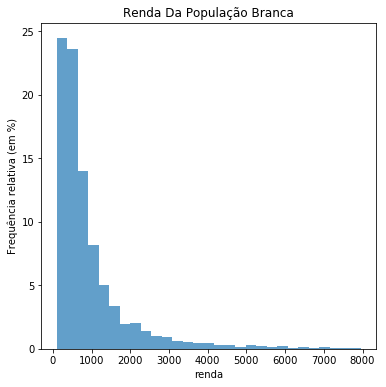

count    1.587860e+05
mean     5.711461e+10
std      2.320622e+11
min      0.000000e+00
25%      3.380000e+02
50%      6.170000e+02
75%      1.250000e+03
max      1.000000e+12
Name: V4742, dtype: float64


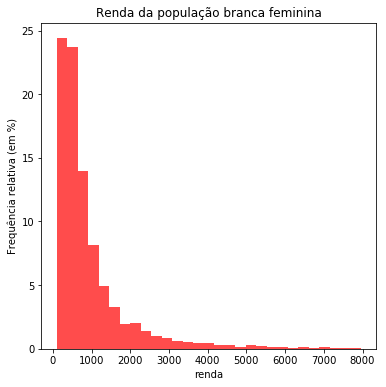

count    8.409400e+04
mean     5.754275e+10
std      2.328781e+11
min      0.000000e+00
25%      3.370000e+02
50%      6.120000e+02
75%      1.233000e+03
max      1.000000e+12
Name: V4742, dtype: float64


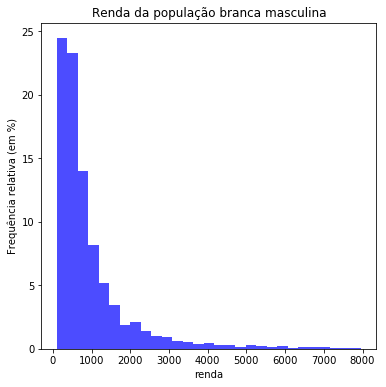

count    7.469200e+04
mean     5.663257e+10
std      2.311407e+11
min      0.000000e+00
25%      3.400000e+02
50%      6.250000e+02
75%      1.250000e+03
max      1.000000e+12
Name: V4742, dtype: float64


In [137]:
faixa = range(100,8000,271)
renda_brancos=renda.loc[(dadosID2011['V0404'] == 'Branca')]
plot = renda_brancos.plot.hist(bins=faixa,title='Renda Da População Branca', weights=zeros_like(renda_brancos)+1./renda_brancos.size*100, figsize=(6, 6), alpha=0.7)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancos.describe())

renda_brancas=renda_brancos.loc[(branca['V0302'] == 'Feminino')]
plot2 = renda_brancas.plot.hist(bins=faixa,title='Renda da população branca feminina', weights=zeros_like(renda_brancas)+1./renda_brancas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancas.describe())

renda_brancos_homens=renda_brancos.loc[(branca['V0302'] == 'Masculino')]
plot3 = renda_brancos_homens.plot.hist(bins=faixa,title='Renda da população branca masculina', weights=zeros_like(renda_brancos_homens)+1./renda_brancos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancos_homens.describe())

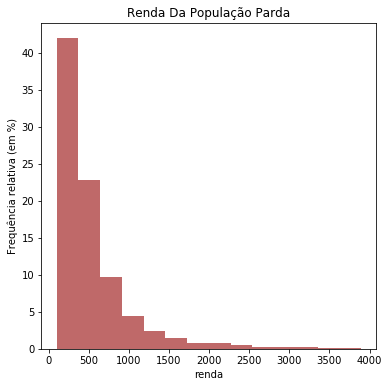

count    1.652770e+05
mean     5.033368e+10
std      2.186332e+11
min      0.000000e+00
25%      2.000000e+02
50%      3.670000e+02
75%      6.800000e+02
max      1.000000e+12
Name: V4742, dtype: float64


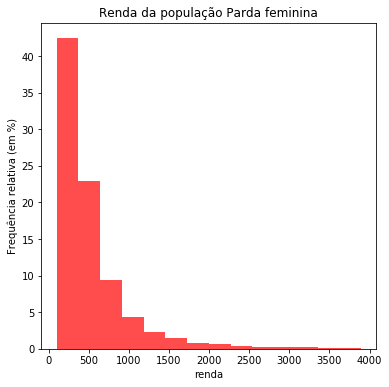

count    8.332300e+04
mean     4.993819e+10
std      2.178186e+11
min      0.000000e+00
25%      1.980000e+02
50%      3.630000e+02
75%      6.660000e+02
max      1.000000e+12
Name: V4742, dtype: float64


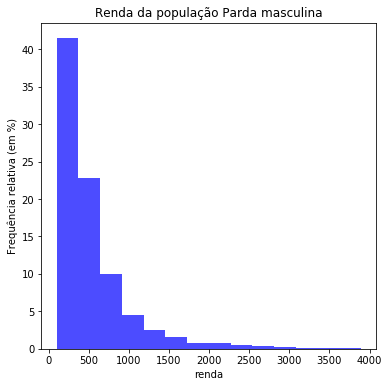

count    8.195400e+04
mean     5.073578e+10
std      2.194590e+11
min      0.000000e+00
25%      2.000000e+02
50%      3.750000e+02
75%      7.000000e+02
max      1.000000e+12
Name: V4742, dtype: float64


In [138]:
faixa = range(100,4000,271)
renda_pardos=renda.loc[(dadosID2011['V0404'] == 'Parda')]
plot = renda_pardos.plot.hist(bins=faixa,title='Renda Da População Parda', weights=zeros_like(renda_pardos)+1./renda_pardos.size*100, figsize=(6, 6), alpha=0.7,color=("Brown"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardos.describe())

renda_pardas=renda_pardos.loc[(parda['V0302'] == 'Feminino')]
plot2 = renda_pardas.plot.hist(bins=faixa,title='Renda da população Parda feminina', weights=zeros_like(renda_pardas)+1./renda_pardas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardas.describe())

renda_pardos_homens=renda_pardos.loc[(parda['V0302'] == 'Masculino')]
plot3 = renda_pardos_homens.plot.hist(bins=faixa,title='Renda da população Parda masculina', weights=zeros_like(renda_pardos_homens)+1./renda_pardos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardos_homens.describe())

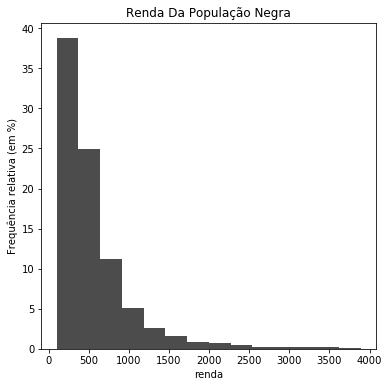

count    3.038500e+04
mean     5.670561e+10
std      2.312830e+11
min      0.000000e+00
25%      2.320000e+02
50%      4.100000e+02
75%      7.330000e+02
max      1.000000e+12
Name: V4742, dtype: float64


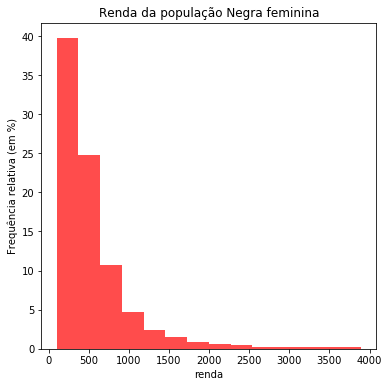

count    1.501900e+04
mean     5.732739e+10
std      2.324748e+11
min      0.000000e+00
25%      2.250000e+02
50%      4.000000e+02
75%      7.150000e+02
max      1.000000e+12
Name: V4742, dtype: float64


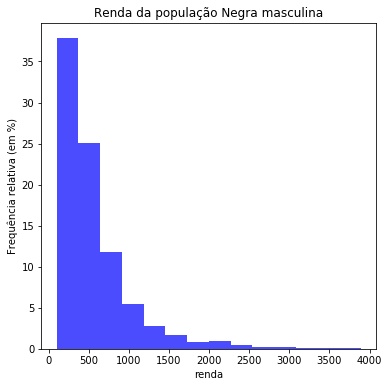

count    1.536600e+04
mean     5.609788e+10
std      2.301181e+11
min      0.000000e+00
25%      2.360000e+02
50%      4.220000e+02
75%      7.500000e+02
max      1.000000e+12
Name: V4742, dtype: float64


In [139]:
faixa = range(100,4000,271)
renda_negros=renda.loc[(dadosID2011['V0404'] == 'Preta')]
plot = renda_negros.plot.hist(bins=faixa,title='Renda Da População Negra', weights=zeros_like(renda_negros)+1./renda_negros.size*100, figsize=(6, 6), alpha=0.7,color=("Black"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negros.describe())

renda_negras=renda_negros.loc[(negra['V0302'] == 'Feminino')]
plot2 = renda_negras.plot.hist(bins=faixa,title='Renda da população Negra feminina', weights=zeros_like(renda_negras)+1./renda_negras.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negras.describe())

renda_negros_homens=renda_negros.loc[(negra['V0302'] == 'Masculino')]
plot3 = renda_negros_homens.plot.hist(bins=faixa,title='Renda da população Negra masculina', weights=zeros_like(renda_negros_homens)+1./renda_negros_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negros_homens.describe())

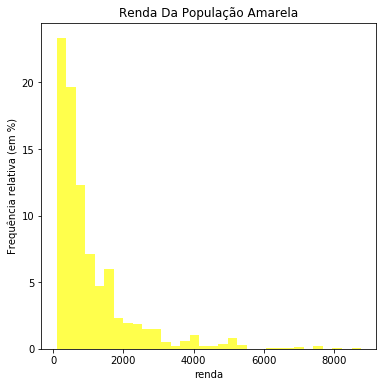

count    1.792000e+03
mean     6.417411e+10
std      2.451312e+11
min      0.000000e+00
25%      3.210000e+02
50%      6.660000e+02
75%      1.521250e+03
max      1.000000e+12
Name: V4742, dtype: float64


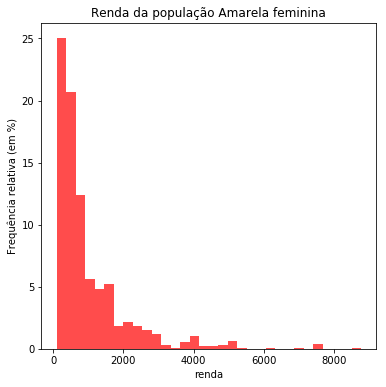

count    9.830000e+02
mean     5.900305e+10
std      2.357504e+11
min      0.000000e+00
25%      2.895000e+02
50%      5.960000e+02
75%      1.449500e+03
max      1.000000e+12
Name: V4742, dtype: float64


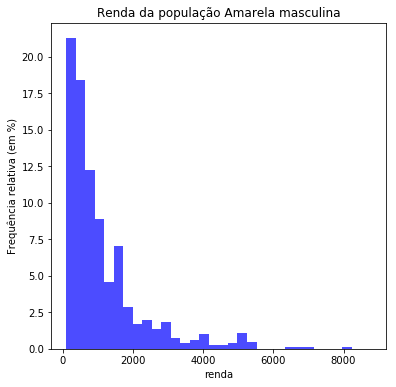

count    8.090000e+02
mean     7.045736e+10
std      2.560745e+11
min      0.000000e+00
25%      3.690000e+02
50%      7.600000e+02
75%      1.660000e+03
max      1.000000e+12
Name: V4742, dtype: float64


In [140]:
faixa = range(100,9000,271)
renda_amarelos=renda.loc[(dadosID2011['V0404'] == 'Amarela')]
plot = renda_amarelos.plot.hist(bins=faixa,title='Renda Da População Amarela', weights=zeros_like(renda_amarelos)+1./renda_amarelos.size*100, figsize=(6, 6), alpha=0.7,color=("Yellow"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelos.describe())

renda_amarelas=renda_amarelos.loc[(amarela['V0302'] == 'Feminino')]
plot2 = renda_amarelas.plot.hist(bins=faixa,title='Renda da população Amarela feminina', weights=zeros_like(renda_amarelas)+1./renda_amarelas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelas.describe())

renda_amarelos_homens=renda_amarelos.loc[(amarela['V0302'] == 'Masculino')]
plot3 = renda_amarelos_homens.plot.hist(bins=faixa,title='Renda da população Amarela masculina', weights=zeros_like(renda_amarelos_homens)+1./renda_amarelos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelos_homens.describe())

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!